# Lab Exercise 08
---

## Machine Learning

Herein we will be introducing and discussing some machine learning models at a high level to get first time and beginner biomedical informaticians a taste for some of the problems machine learning can help solve. Furthermore, we will implement both a logisitic regression model, a vanilla neural network, decision tree, and random foret model and evaluate the efficacy of these models on an example dataset.

As this is a brief survey course on machine learning, we will not dive too deep into the theory of these models, nor will we be able to cover every type of model. At the end of this notebook I have provided a list of references and resources that biomedical informaticians, beginner, novice, and experts alike, may find useful and insightful.

<img width="800px" src="img/extended_ml_cheat_sheet.jpeg"/>

[An Extended Version Of The Scikit-Learn Cheat Sheet](https://medium.com/@chris_bour/an-extended-version-of-the-scikit-learn-cheat-sheet-5f46efc6cbb)

**Disclaimer:** Understanding the dataset with which you are working, ensuring it is clean, workable data, and formulating hypotheses you wish to test with your data are all ***VERY*** important aspects to consider before diving into machine or deep learning models with your data. **The above figure, and corresponding article, depict this point excellently.**

https://scikit-learn.org/stable/common_pitfalls.html

---

### Types of machine learning

There are many different types of models in machine learning and choosing the best one is dependent on:
1. The problem you aim to solve
2. The data you have

In some instances multiple models may work well for you, in which case you will have to consider other aspects of the model, such as:
* interpretability
* memory cost
* number of samples
* dimensionality
* and so on...

Though these considerations may help you narrow down your choices, choosing the *best* remains a difficult task. I will provide some general information about different types of machine learning models while keeping some of the above aspects in mind.

Below is a figure that shows a very well defined hierarchy of different ML models that one can consider. The upper level of this hierarchy gives 3 main learning types: **supervised**, **unsupervised**, and **reinforcement**. I will discuss all 3 of these as well as a fourth, called **semi-supervised**.

<img width="500px" src="img/ml_hierarchy.png"/>


### Supervised learning

Samples of input-output pairs (labelled outcomes)

**Classification** - predict the binary (or class) label for an unlabeled sample. Examples: logistic regression, SVM

**Regression** - predict a real-valued label for an unlabeled sample. Examples: linear regression 

<img width="400px" src="img/class_v_reg.png"/>

In classification models, the boundary separating the examples of different classes is called the *decision boundary*. For regression models, the line that best fits the data is the *regression line*. 

https://en.wikipedia.org/wiki/Supervised_learning

https://scikit-learn.org/stable/supervised_learning.html

*Logistic regression and the vanilla neural network we will implement herein are both considered supervised classification models. Therefore, this model type will be our main focus for this notebook.*

### Unsupervised learning

Draw inferences and patterns from input data without labelled output data. Examples: k-means, PCA

<img width="400px" src="img/clusters.png"/>

https://en.wikipedia.org/wiki/Unsupervised_learning

https://scikit-learn.org/stable/unsupervised_learning.html

### Semi-supervised learning

Supervised learning tasks and techniques that also make use of unlabeled data for training.

https://en.wikipedia.org/wiki/Semi-supervised_learning

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.semi_supervised

### Reinforcement learning

Model tries a bunch of different things and is given a reward signal when doing something well.

https://en.wikipedia.org/wiki/Reinforcement_learning


## Bias-variance tradeoff

**Variance** is the error in the model due to sensitivity to the data. 

High variance means our model is *overfit* and has been trained to the noise in the data.

**Bias** is the error between the predicted and known labels for our data.

High bias means our model is *underfit* and does not predict the correct outcome for our data.

<img width="400px" src="img/hl_bias-hl_variance.png" /> 

We can think about (A) high variance and high bias, (B) low variance and high bias, (C) high variance and low bias, and (D) low variance and low bias. We are aiming to accomplish (D)!

So, when we look at the plot below we can relate variance and bias directly to how we are training our models. We are looking to hit that sweet spot where the bias and variance curves intersect. That is a good model.

<img width="400px" src="img/variance_v_bias.jpeg" /> 


## Logistic regression
Logistic regression is a simple and commonly used machine learning algorithm for two-class classification. It is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. Logistic regression can be used to answer questions such as:
* How does the probability of getting lung cancer (yes vs. no) change for every additional pound a person is overweight and for every pack of cigarettes smoked per day?
* Do body weight, calorie intake, fat intake, and age have an influence on the probability of having a heart attack (yes vs. no)?

*Logistic regression can also be used for multi-class predictions, but we will not cover that here.*

In general, logistic regression uses a linear combination of more than one feature value or explanatory variable as argument of the sigmoid function:

$f(x) = \frac{1}{1+e^{-x}}$

The corresponding output of the sigmoid function is a number between 0 and 1. 

<img width="300px" src="img/sigmoid.png"/>

The middle value is considered as threshold to establish what belongs to the class 1 and to the class 0. In particular, an input producing an outcome greater than 0.5 is considered belonging to the class 1. Conversely, if the output is less than 0.5, then the corresponding input is classified as belonging to class 0.

For our logistic regression model we use the logistic function:

$f_{w,b}(x) = \frac{1}{1+e^{-(wx+b)}}$

The logistic function is our **activation function**. This is going to tell us when a sample is 0 or 1.

To calculate the solution to this equation, i.e. obtain the best intercept and coefficients, we aim to maximize the **log likelihood** of the training data.

$ \ln L_{\mathbf{w},b} = \sum_{i=1}^{N}y_{i}\ln f_{\mathbf{w},b}(x_{i})+(1-{y_{i}}) \ln (1-f_{\textbf{w},b}(x_{i})$

Though it may appear daunting, when you break it down, it isn't that bad. When $y_{i}=1$, the second part of the summation drops out (1-1=0), whereas when $y_{i}=0$ the first part of the equation drops out. 

Log likelihood is our **cost function**. Generally, minimizing functions is preferred over maximizing, so the negative of the function is commonly used.

## Optimizers

The general point is there are many methods that have been developed and well tested for optimizing (maximizing or minimizing) a function. You start with a guess then you adjust the parameters over several iterations until you have converged to some point (number of iterations, tolerance, etc.).

<img width="300px" src="img/minimization.gif"/>


I do not go into specific optimizers here, for the sake of time. I do think I will update this notebook in the future to include a nice section on optimizers.

https://en.wikipedia.org/wiki/Gradient_descent

https://scikit-learn.org/stable/modules/sgd.html

https://en.wikipedia.org/wiki/Limited-memory_BFGS

For our implementation of logistic regression, we will use scikit-learn's LogisticRegression model:
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Let's load the libraries we will be using...

In [1]:
import pandas as pds
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
    f1_score, roc_auc_score, auc, precision_recall_curve, roc_curve,\
    classification_report, confusion_matrix

In [2]:
## load Pima Indians Diabetes dataset (downloaded May 14, 2019; N=768)
df = pds.read_csv("diabetes.csv")

## Missingness

The only cleaning we need to do is to drop the rows that contain missing values. In general practice, you do not remove these rows without further exploratory analysis. However, for sake of this example, we have omitted rows that contain missing values.

In [3]:
## function to determine of a row has an missing value
def valid_value(row):
    if 0 == row['Glucose'] or \
       0 == row['BloodPressure'] or \
       0 == row['SkinThickness'] or \
       0 == row['Insulin'] or \
       0 == row['BMI'] or \
       0 == row['Age']:
        return False
    else:
        return True

## create dataframe with only valid rows
df_pima = df[df.apply(lambda row: valid_value(row), axis=1)]
df_pima.dropna(inplace=True)
df_pima.head()

/var/folders/v7/0z9cjl454x91zzzq_zkctf_w0000gn/T/ipykernel_87134/580688250.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pima.dropna(inplace=True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0
13,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59.0,1.0


In [4]:
print(f"length of original dataframe: {len(df)}")
print(f"length of filtered dataframe: {len(df_pima)}")

length of original dataframe: 775
length of filtered dataframe: 364


## Splitting samples

Now we split the data into our training and test sets. We do this because we need to train the model on some of the data and ensure that we have generalizable model by testing the optimized model on samples it has never seen.

<img width="600px" src="img/data.png" />

First, we separate the features. By convention, scikit-learn often refers to the feature dataset as `X` and the target dataset as `y`.


In [5]:
## split dataset in features and target variable
feature_cols = \
    ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose',
     'BloodPressure','DiabetesPedigreeFunction', 'SkinThickness']

X = df_pima[feature_cols]
y = df_pima['Outcome']

In [6]:
## split dataset into training set and test set
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test
print(len(X_train))
print(len(X_test))

254
110


Finally, the test and training data is fit to our model and we predict outcomes.

In [7]:
## create a logistic regression classifier and predict
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]
print(f"Our model converged after {model.n_iter_[0]} iterations.")

Our model converged after 169 iterations.


## Evaluating the model
To evaluate our logistic regression model, we will examine the confusion matrix, accuracy score, precision score, recall score, and f1 score. 

**Accuracy:**
* $\frac{TP + TN}{TP + TN + FP + FN}$
* Accuracy is the ratio of correct predictions to total predictions made. However, there are problems with accuracy. It assumes equal costs for both kinds of errors. A 99% accuracy can be excellent, good, mediocre, poor or terrible depending upon the problem.

**Precision:**
* $\frac{TP}{TP + FP}$
* Precision is the ability of a classifier not to label an instance positive that is actually negative. High precision indicates a small number of false positives.

**Recall:**
* $\frac{TP}{TP + FN}$
* Recall is the ability of a classifier to find all positive instances. High recall indicates a small number of false negatives.

<img width="300px" src="img/precision-recall.png" />

**F1 score (F measure):**
* $\frac{2 * Recall * Precision}{Recall + Precision}$
* Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F1 score that uses Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more. 

In [8]:
def show_confusion_matrix(y_test, y_pred, palette="inferno"):
    ## see: https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
    ##      https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html
    ##      https://classeval.wordpress.com/introduction/basic-evaluation-measures/
    matrix = confusion_matrix(y_test, y_pred)

    colors = sns.color_palette(palette) # set the colors to use for heatmap
    # print(colors.as_hex()) # uncomment this to see color palette

    ax = sns.heatmap(matrix, square=True, annot=True, fmt='d', 
                     cbar=False, cmap=colors, vmin=-1, annot_kws={"size":13}, linewidths=1.0)

    # set labels on figure
    ax.set_xticklabels(labels=["neg","pos"], fontsize=13)
    ax.set_yticklabels(labels=["neg","pos"], fontsize= 13)
    plt.xlabel("\nactual value", fontsize=15)
    plt.ylabel("predicted value\n", fontsize=15)
    plt.show()
    
def plot_static_roc_curve(fpr, tpr):
    plt.figure(figsize=[5,5])
    plt.fill_between(fpr, tpr, alpha=.5, color='darkorange')
    # Add dashed line with a slope of 1
    plt.plot(fpr, tpr, color='darkorange', lw=2)
    plt.plot([0,1], [0,1], linestyle=(0, (5, 5)), linewidth=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve");
    
def plot_static_pr_curve(recall, precision):
    plt.figure(figsize=[5,5])
    plt.fill_between(recall, precision, alpha=.5, color='darkorange')
    plt.plot(recall, precision, color='darkorange', lw=2)
    # Add dashed line with a slope of 1
    plt.plot([1,0], [0,1], linestyle=(0, (5, 5)), linewidth=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-recall curve");

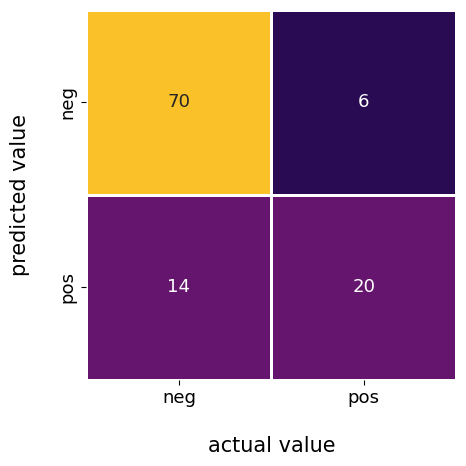

In [9]:
## show confustion matrix
show_confusion_matrix(y_test, y_pred)

In [10]:
accuracy_score(y_test, y_pred)

0.8181818181818182

In [11]:
precision_score(y_test, y_pred)

0.7692307692307693

In [12]:
recall_score(y_test, y_pred)

0.5882352941176471

In [13]:
f1_score(y_test, y_pred)

0.6666666666666667

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.88        76
         1.0       0.77      0.59      0.67        34

    accuracy                           0.82       110
   macro avg       0.80      0.75      0.77       110
weighted avg       0.81      0.82      0.81       110



### Receiver operating characteristic curve

Another common metric for classification problems is area under the receiver operating characteristic (ROC) curve. This plot, and associated scalar metric, assesses a model's performance by comparing the true positive rate (TPR) to the false positive rate (FPR) at varying thresholds. What this means is as the threshold varies from 0 to 1, can the model still successfully discern the two classes.

**Sensitivity/True positive rate (TPR):**
* TPR = TP / (TP + FN)
* TPR is the ability of a classifier to find all positive instances. High TPR indicates a small number of false negatives.

**Specificity/True negative rate (TNR):**
* TNR = TN / (TN + FP)
* TNR is the ability of a classifier to find all negative instances. High TNR indicates a small number of false positives.

**False positive rate (FPR):**
* FPR = FP / (FP + TN)
* FPR is the ability of a classifier to incorrectly predicting positives instances. Low FPR indications a small number of false positives.

<img width="300px" src="img/sensitivity-specificity.png" />


In [15]:
roc_auc_score(y_test, y_proba)

0.8680340557275541

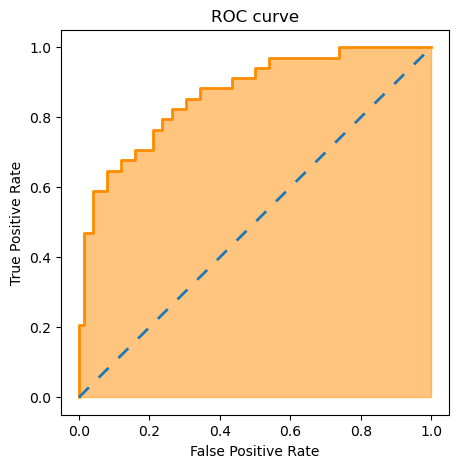

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plot_static_roc_curve(fpr,tpr)

### Precision recall curve

Related to the above ROC curve, the precision recall curve, and the area under it, is often used as a metric to determine classification model efficacy. This metric is especially important for imbalanced class sizes -- one class has far more samples (majority) than the other class (minority). The difference between this curve and the ROC curve is the use of precision instead of FPR (TPR and recall are the same metric). Precision is less affected by a large number of negative samples because it takes into account true positives and false positives. On the other hand, FPR is based upon false positives and true negatives so for a large number of negative samples this metric would very slowly increase. **Precision is focused on the positive class**

*Use AUPR when you have imbalanced classes, specifically when you have a majority of negative samples (usually the case).*

In [17]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
auc(recall, precision)

0.7891649793863438

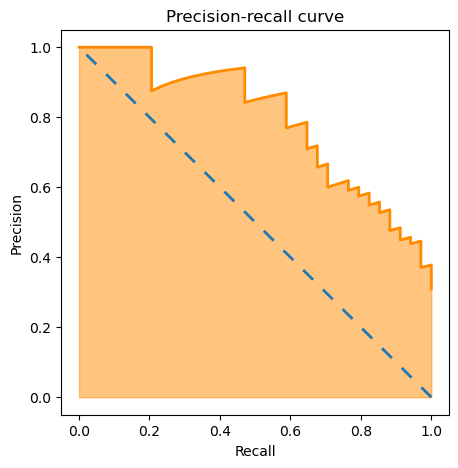

In [18]:
plot_static_pr_curve(recall,precision)

Interesting artifact of this plot, the rapid drop to the left of the plot is due to the way the curve is calculated. As you move right to left on the plot the threshold for determining if a prediction is postive becomes more stringent. So on the far left, there are very few positive class predictions (both true and false positives), so adding one more false or true positive (moving towards the right) can greatly affect the precision. 

### Interpretability and feature importance

We will analyze the model a bit more to understand what the model is doing and what features are most important to the classification.

First, we will extract the coefficients from the model and match them with the corresponding name of the features.

In [19]:
coefs = list(zip(feature_cols,model.coef_[0]))
coefs

[('Pregnancies', 0.07696948772508624),
 ('Insulin', -0.0013235968941847525),
 ('BMI', 0.0954470543391172),
 ('Age', 0.03172298193646384),
 ('Glucose', 0.035398180025422235),
 ('BloodPressure', 0.007339781603463488),
 ('DiabetesPedigreeFunction', 0.882784174815506),
 ('SkinThickness', -0.005320468290071015)]

Next, we take the exponential of the coefficients to calculate the odds ratio for each feature.

In [20]:
odds_ratio = [(x[0],math.exp(x[1])) for x in coefs]
odds_ratio

[('Pregnancies', 1.080009122354601),
 ('Insulin', 0.998677278673842),
 ('BMI', 1.1001505722927927),
 ('Age', 1.0322315189187579),
 ('Glucose', 1.0360321539898696),
 ('BloodPressure', 1.0073667838234954),
 ('DiabetesPedigreeFunction', 2.4176214255410557),
 ('SkinThickness', 0.994693660333272)]

We see that of these features the most important appears to be Diabetes Pedigree Function. The odds ratio tells us that for every 1 unit increase in Diabetes Pedigree Function a patient is 2.53x more likely to experience the outcome (diabetes)

In [21]:
[(x[0],(x[1]-1)*100.0) for x in odds_ratio]

[('Pregnancies', 8.000912235460088),
 ('Insulin', -0.13227213261579607),
 ('BMI', 10.015057229279268),
 ('Age', 3.223151891875786),
 ('Glucose', 3.6032153989869586),
 ('BloodPressure', 0.7366783823495426),
 ('DiabetesPedigreeFunction', 141.76214255410557),
 ('SkinThickness', -0.5306339666727999)]

## Changing the splitting

What happens if we change the training/testing split to 80/20...

In [22]:
## split dataset into training set and test set
X2_train, X2_test, y2_train, y2_test = \
    train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

## create a logistic regression classifier and predict
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X2_train, y2_train)
y2_pred = model.predict(X2_test)
y2_proba = model.predict_proba(X2_test)[:,1]
print(f"Our model converged after {model.n_iter_[0]} iterations.")

print(classification_report(y2_test, y2_pred))

Our model converged after 214 iterations.
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86        50
         1.0       0.75      0.52      0.62        23

    accuracy                           0.79        73
   macro avg       0.78      0.72      0.74        73
weighted avg       0.79      0.79      0.78        73



For our implementation of neural network, we will use keras's sequential model:
* https://keras.io/guides/sequential_model/

Let's load the libraries we will be using...

In [23]:
from numpy.random import seed
seed(42)
from tensorflow.random import set_seed
set_seed(42)
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=75, batch_size=10)

# make class predictions with the model
y_proba = model.predict(X_test)
y_pred = (y_proba > 0.5).astype("int32")

In [ ]:
## show confustion matrix
show_confusion_matrix(y_test, y_pred)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
# calculate F1 score
f1_score(y_test, y_pred)

In [ ]:
# calculate AUROC
roc_auc_score(y_test, y_pred)

In [ ]:
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plot_static_roc_curve(fpr,tpr)

In [ ]:
# calculate PR curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
# calculate AUPR
auc(recall, precision)

In [ ]:
plot_static_pr_curve(recall,precision)

### Underfitting and Overfitting

The below figure is an excellent example of underfitting, a good fit, and overfitting.

<img width="800px" src="img/model_fit.png"/>

There are methods for avoiding overfitting, such as regularization, dropout, etc. You can learn more about these in many of the references provided.

https://scikit-learn.org/stable/model_selection.html

*Choosing the right model(s), activation function(s), and **hyperparameters** are crucial for creating a robust and **generalizable** model.*


## Decision Trees

<img width="300px" src="img/decision_tree-example.jpeg" /> 

Decision trees can be used for both classification and regression.  They are similar to if/then statements.

* Tree depth: how many questions do we ask until we reach our decision? (denoted by its longest route)
* Root node: first decision
* Leaf node: final node of the tree

<img 
  width="500px"
  src="img/Decision-tree-showing-the-risk-of-malignant-effusion-when-medical-history-and-diagnostic.png" /> 

How is a decision tree trained? The goal is finding the best feature that maximizes the information gain at each node. 

Entropy: Quantifies the amount of uncertainty associated with a specific probability distribution. The higher the entropy, the less confident we are in the outcome.

Information Gain: How much do we gain (in terms of reduction in entropy) from knowing one of the features.

Advantages: 
* easy to interpret
* can use both qualitative and quantitative predictors and responses
* reproducible in clinical workflow
* fast and perform well on large datasets

Disadvantages:
* need an optimal choice at each node; at each step, the algorithm chooses the best result. Choosing the best result at a given step does not ensure an optimal decision when you make it to the leaf node
* prone to over-fitting, especially with deep trees (fix: can set a max depth--this limits variance, but at the expense of bias!)

Here are some links with more information about decision trees:
* https://www.datacamp.com/community/tutorials/decision-tree-classification-python
* http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/
* https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

In [24]:
import pandas as pds
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
        roc_auc_score, auc, precision_recall_curve, roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import tree
from IPython.display import Image 

import random
## set seed for randomization
random.seed(42)

In [25]:
## load Pima Indians Diabetes dataset (downloaded May 14, 2019; N=768)
df = pds.read_csv("diabetes.csv")

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,NaN,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [27]:
## function to determine of a row has an missing value
def valid_value(row):
    if 0 == row['Glucose'] or \
       0 == row['BloodPressure'] or \
       0 == row['SkinThickness'] or \
       0 == row['Insulin'] or \
       0 == row['BMI'] or \
       0 == row['Age']:
        return False
    else:
        return True

## create dataframe with only valid rows
df_pima = df[df.apply(lambda row: valid_value(row), axis=1)]
df_pima.dropna(inplace=True)
df_pima

/var/folders/v7/0z9cjl454x91zzzq_zkctf_w0000gn/T/ipykernel_87134/2970196991.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pima.dropna(inplace=True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0
13,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59.0,1.0
...,...,...,...,...,...,...,...,...,...
754,1.0,81.0,74.0,41.0,57.0,46.3,1.096,32.0,0.0
760,0.0,181.0,88.0,44.0,510.0,43.3,0.222,26.0,1.0
762,1.0,128.0,88.0,39.0,110.0,36.5,1.057,37.0,1.0
767,2.0,88.0,58.0,26.0,16.0,28.4,0.766,22.0,0.0


## Implementing decision trees
Now that the data has been inspected and cleaned, we can implement a decisio tree.

For this will will use scikit-learn's `DecisionTreeClassifier()`:
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

To use this funcition, we need to define a dataset that contains the features used to build our decision tree, and a dataset that contains the target (or outcome) we are trying to coming to arrive at decision about.

By convention, scikit-learn often refers to the feature dataset as `X` and the target dataset as `y`.



In [28]:
#split dataset in features and target variable
feature_cols = \
    ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose',
     'BloodPressure','DiabetesPedigreeFunction', 'SkinThickness']

X = df_pima[feature_cols]
y = df_pima['Outcome']

In order to build the decision tree, we will need to split the dataset into a training set and a test set. The training set that is used to build the tree, and the test set that is used to evaluate it.

This is necessary for both the feature dataset (`X`) and the target/outcome dataset (`y`).

Scikit-learn's `train_test_split()` funciton allows us to easily do this.

In [29]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test


After creating the training and test datasets, we call the `DecisionTreeClassifier()` function  to build the decision tree. 

The hierarchical structure of a decision tree leads us to the final outcome by traversing through the nodes of the tree. Each node consists of an attribute or feature which is further split into more nodes as we move down the tree.

The Gini index (or Gini impurity) is the default method used determine the features to used at each node. Briefly, Gini index measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen. If all the elements belong to a single class, then it can be called pure. The degree of Gini index varies between 0 and 1, where 0 denotes that all elements belong to a certain class or if there exists only one class, and 1 denotes that the elements are randomly distributed across various classes. A Gini Index of 0.5 denotes equally distributed elements into some classes.

*The goal is to have the lowest possible Gini index at each split.*

More information about the Gini index and other methods for feature splitting is found here:
* https://blog.quantinsti.com/gini-index/
* https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1

In the below code, I create a decision tree named `dtree`. After the tree is created, the `fit` method is called to train (i.e., build) the tree using the traing data `X_train`.

In [30]:
# create decision tree classifer object
dtree = DecisionTreeClassifier()

# train decision tree classifer
dtree = dtree.fit(X_train, y_train)

## Visualizing the tree
With the decision tree built, we can visualize the nodes. For this will use scikit-learn's `export_graphviz()` funciton:
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

The generated figure is difficult read, but if you **squint** you may be able to make out the features and values used to make the splits. Importantly, the Gini index of all leaf nodes is `0`.

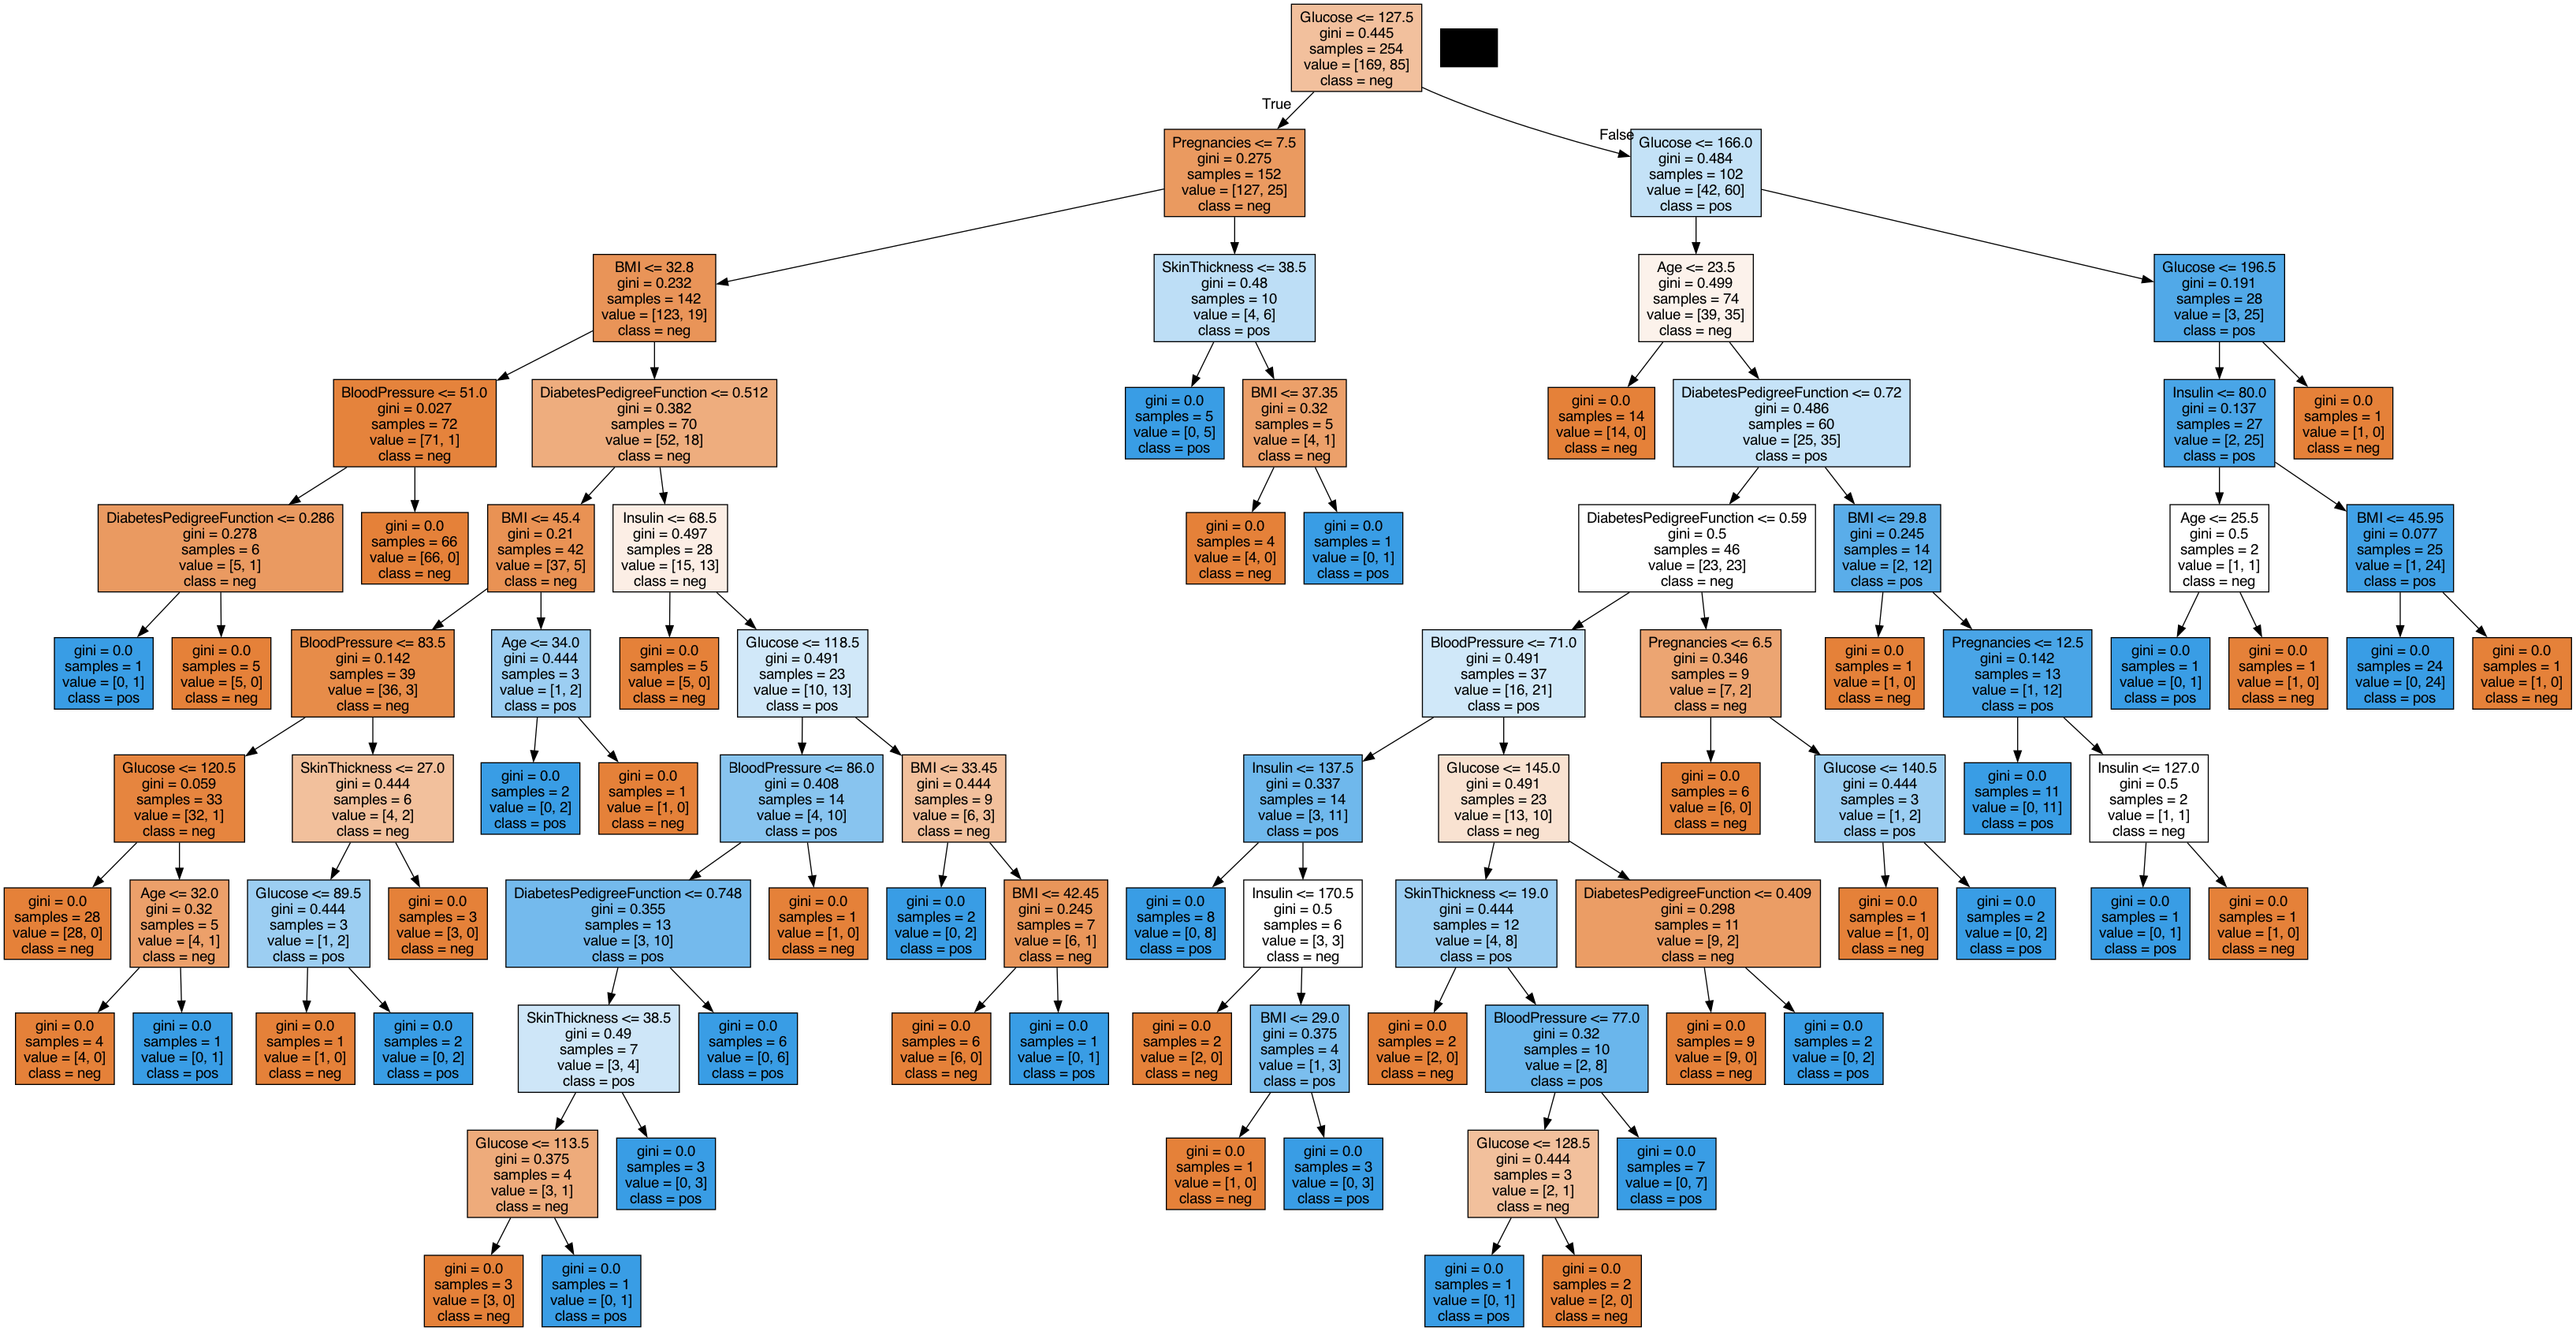

In [31]:
%matplotlib inline
from six import StringIO 
from IPython.display import Image, display

# export the tree as dot
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, 
                                feature_names=feature_cols, 
                                class_names=['neg','pos'])
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

## Tree pruning
A disadvantage of decision trees is that they are prone to overfitting as they grow larger and more complex. In order to avoid or correct overfitting we can **prune** the tree. One way to do this is by limiting the maximum depth of the tree. Another way is use cost complexity pruning. The former just limits the length of the longest path of the decision tree, which will stop the tree from becoming too complex and overfitting the data. Cost complexity pruning places a penalty on the number of terminal leaves that exist in the model, thus restricting the complexity of the tree. These pruning methods may increase training error, but the resulting model will be far more robust to your testing data.

<img width="500px" src="img/pruning.png" /> 

These *pruning* options are considered **hyperparameters**. Hyperparameters are parameters set prior to the model being trained and modulate how the model is trained and therefore directly influence the resulting parameters (weights) in the model.

Below I define a decision tree with a maximum depth of `4` and a decision tree with a cost complexity pruning value of `0.01`, and for convenience I use the labels `neg` and `pos` instead of `0` and `1`. 

It also makes the tree much easier to read :)

In [32]:
# prune the tree to a max depth of 4
dtree_shallow = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
dtree_shallow = dtree_shallow.fit(X_train,y_train)

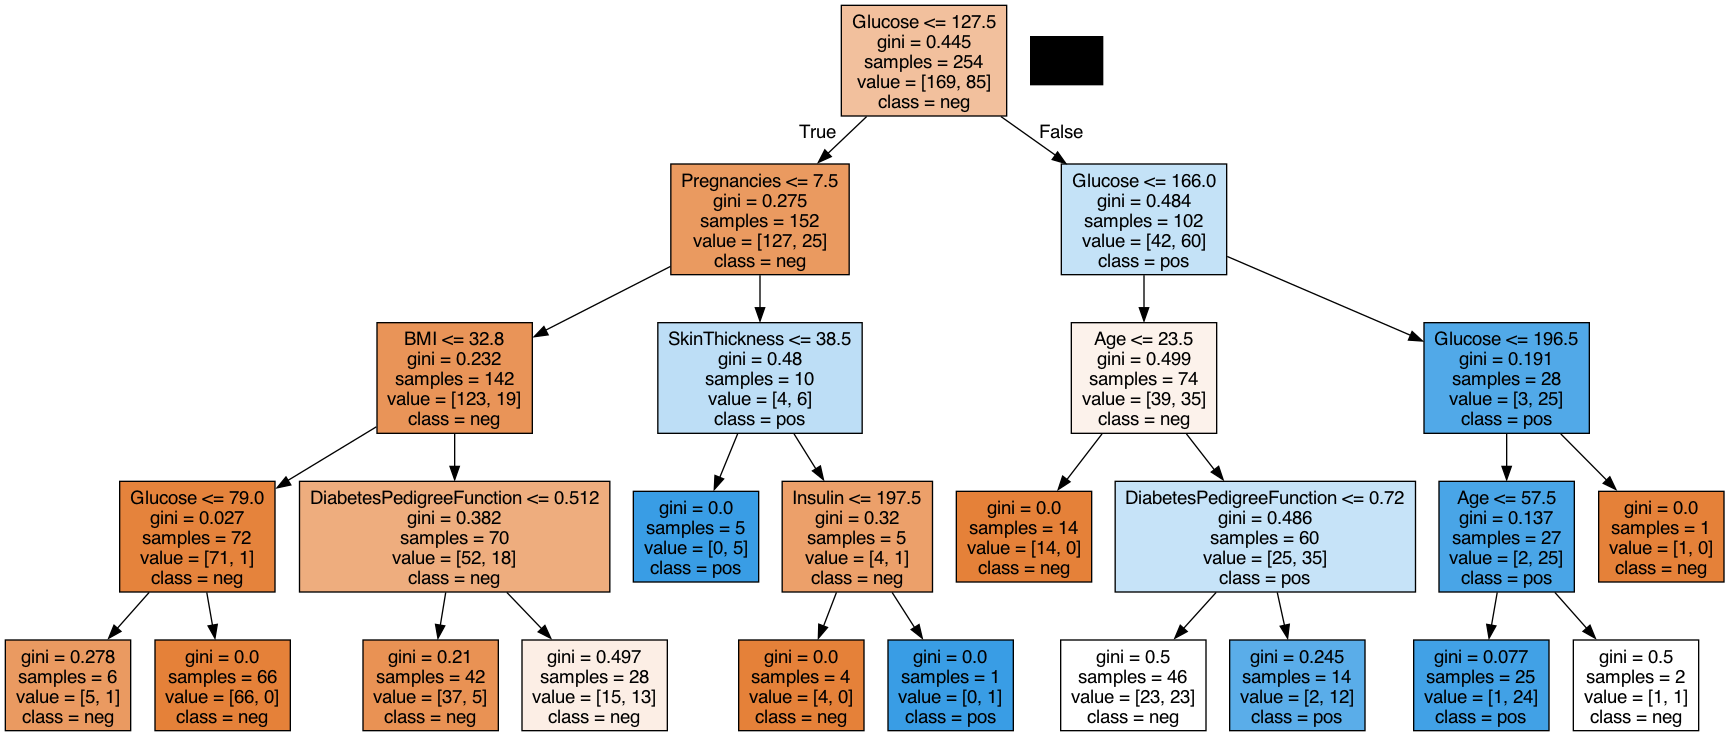

In [33]:
## visualize the pruned tree
dot_data = \
    tree.export_graphviz(dtree_shallow, out_file=None, filled=True, 
                         feature_names=feature_cols, 
                         class_names=['neg','pos'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

And now to run the "pruned" tree...

In [34]:
# prune the tree to using a complexity parameter of 0.01
dtree_pruned = DecisionTreeClassifier(ccp_alpha=0.01) # default criterion="gini"

# Train Decision Tree Classifer
dtree_pruned = dtree_pruned.fit(X_train,y_train)

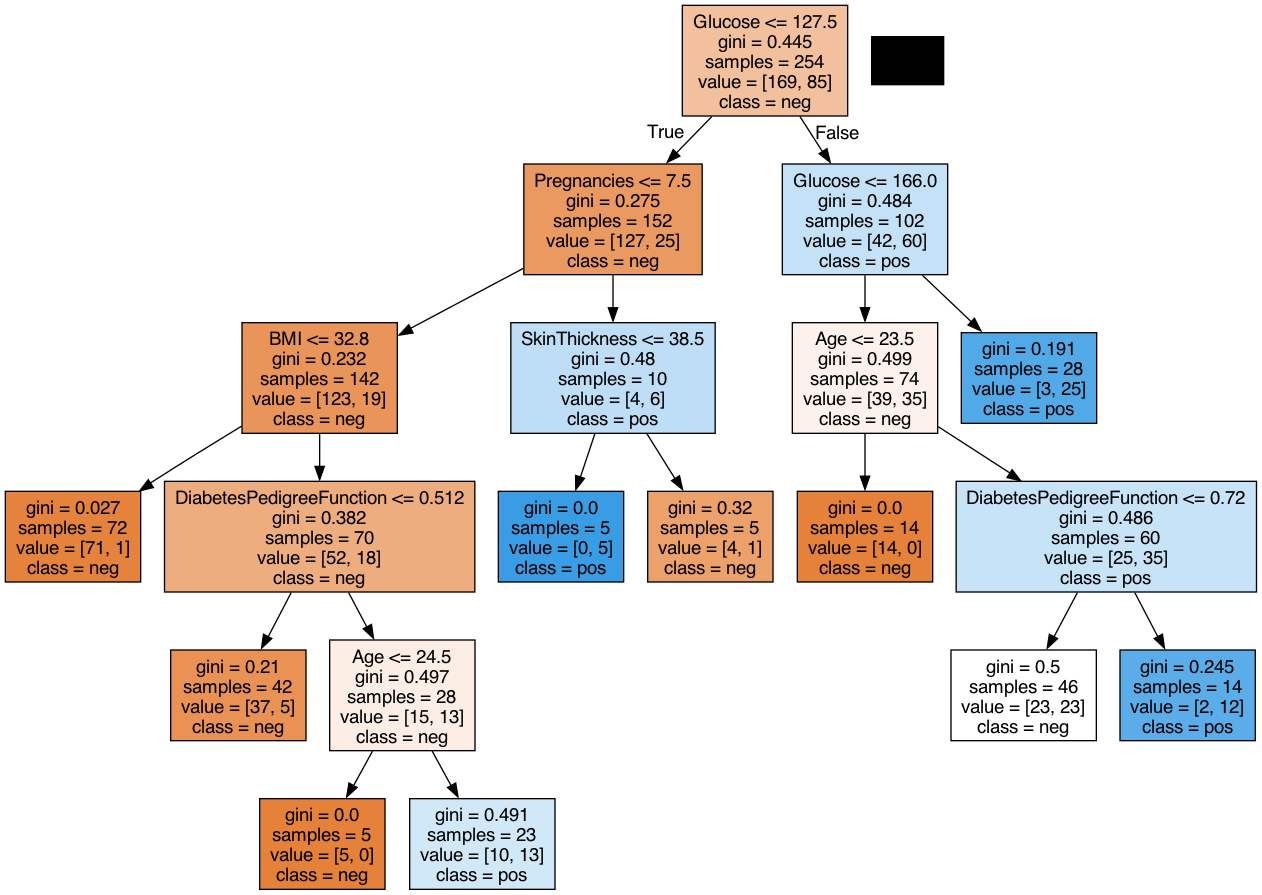

In [35]:
## visualize the pruned tree
dot_data = \
    tree.export_graphviz(dtree_pruned, out_file=None, filled=True, 
                         feature_names=feature_cols, 
                         class_names=['neg','pos'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

## Evaluating output
We need to now evaluate the decision trees (pruned and full). For this, we will use the decision tree `predict()` method. The output of this method will be stored in the variables `y_pred_tree`, `y_pred_shallow`, and `y_pred_pruned`. These (predicted) variables will assedd using a confusion matrix.

### Confusion matrix
<img width="400px" src="img/confusion_matrix3.png" />

A confusion matrix is a summary of prediction results on a classification problem.
The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.
The confusion matrix shows the ways in which your classification model is confused when it makes predictions.
It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made. (https://www.geeksforgeeks.org/confusion-matrix-machine-learning/)

**Definition of the Terms**:
* Positive (P) : Observation is positive (for example: is an apple).
* Negative (N) : Observation is not positive (for example: is not an apple).
* True Positive (TP) : Observation is positive, and is predicted to be positive.
* False Negative (FN) : Observation is positive, but is predicted negative.
* True Negative (TN) : Observation is negative, and is predicted to be negative.
* False Positive (FP) : Observation is negative, but is predicted positive.

Using the confusion matrix, we can define the following metrics of evaluation.

**Accuracy:**
* (TP + TN) / (TP + TN + FP + FN)
* Accuracy is the ratio of correct predictions to total predictions made. However, there are problems with accuracy. It assumes equal costs for both kinds of errors. A 99% accuracy can be excellent, good, mediocre, poor or terrible depending upon the problem.


**Recall:**
* TP / (TP + FN)
* Recall is the ability of a classifier to find all positive instances. High recall indicates a small number of false negatives.


**Precision:**
* TP / (TP + FP)
* Precision is the ability of a classifier not to label an instance positive that is actually negative. High precision indicates a small number of false positives.

**F1 score (F measure):**
* (2 * Recall * Precision) / (Recall + Precision)
* Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F1 score that uses Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more. 

And now to run the "shallow" tree...

In [36]:
## Predict the response for dtree, dtree_shallow, and dtree_pruned decision trees
y_pred_tree = dtree.predict(X_test)
y_pred_shallow = dtree_shallow.predict(X_test)
y_pred_pruned = dtree_pruned.predict(X_test)

Sci-kit learn also provides `accuracy_score`, `recall_score`, and `f1_score` functions to make these calculations easier.

In [37]:
print("tree:", accuracy_score(y_test, y_pred_tree))
print("shallow:", accuracy_score(y_test, y_pred_shallow))
print("pruned:", accuracy_score(y_test, y_pred_pruned))

tree: 0.7909090909090909
shallow: 0.7545454545454545
pruned: 0.7454545454545455


Here are the recall and precision scores.

In [38]:
print("tree:", recall_score(y_test, y_pred_tree))
print("shallow:", recall_score(y_test, y_pred_shallow))
print("pruned:", recall_score(y_test, y_pred_pruned))

tree: 0.5588235294117647
shallow: 0.35294117647058826
pruned: 0.4411764705882353


In [39]:
print("tree:", precision_score(y_test, y_pred_tree))
print("shallow:", precision_score(y_test, y_pred_shallow))
print("pruned:", precision_score(y_test, y_pred_pruned))

tree: 0.7037037037037037
shallow: 0.7058823529411765
pruned: 0.625


In [40]:
print("tree:", f1_score(y_test, y_pred_tree))
print("shallow:", f1_score(y_test, y_pred_shallow))
print("pruned:", f1_score(y_test, y_pred_pruned))

tree: 0.6229508196721312
shallow: 0.4705882352941177
pruned: 0.5172413793103449


Notice that the accuracy and precision scores in the pruned and full trees are close. However the recall score is better in the pruned tree, meaning that the pruned tree has a smaller number of false negatives. Compare the lower left boxes in the two confusion matrices below.

If we wish, we can also visualize the confusion matrix of the trees. For convenience, I will define a function to do this. This will allow us to more easily visualize the confusion matrix later.

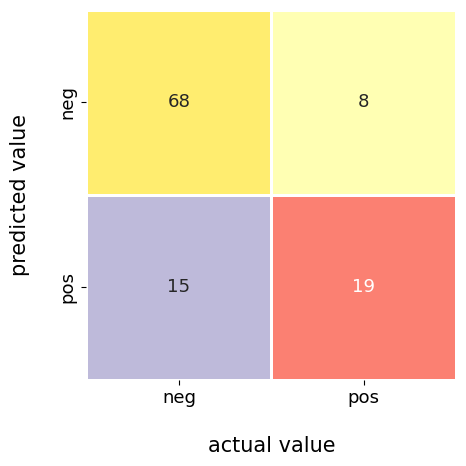

In [41]:
def show_confusion_matrix(y_test, y_pred, palette="Set3"):
    ## see: https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
    ##      https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html
    ##      https://classeval.wordpress.com/introduction/basic-evaluation-measures/
    matrix = confusion_matrix(y_test, y_pred)

    colors = sns.color_palette(palette) # set the colors to use for heatmap
    # print(colors.as_hex()) # uncomment this to see color palette

    ax = sns.heatmap(matrix, square=True, annot=True, fmt='d', 
                     cbar=False, cmap=colors, vmin=-1, annot_kws={"size":13}, linewidths=1.0)

    # set labels on figure
    ax.set_xticklabels(labels=["neg","pos"], fontsize=13)
    ax.set_yticklabels(labels=["neg","pos"], fontsize= 13)
    plt.xlabel("\nactual value", fontsize=15)
    plt.ylabel("predicted value\n", fontsize=15)
    plt.show()

## show confusion matrix for dtree
show_confusion_matrix(y_test, y_pred_tree)

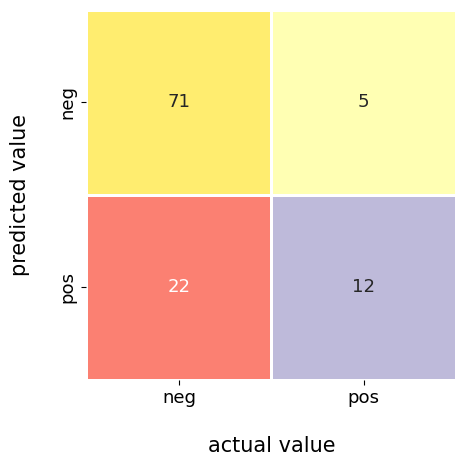

In [42]:
## show confusion matrix for dtree_pruned
show_confusion_matrix(y_test, y_pred_shallow)

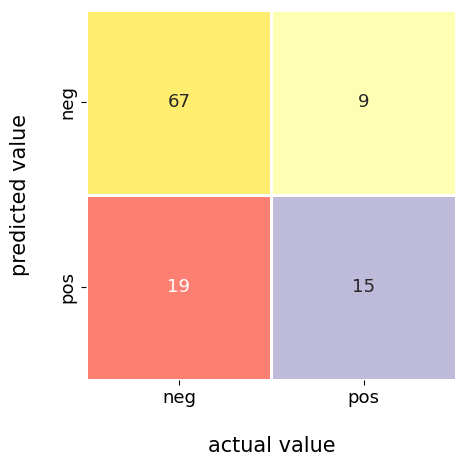

In [43]:
## show confusion matrix for dtree_pruned
show_confusion_matrix(y_test, y_pred_pruned)

As an exercise, use one of the above confusion matrices to compute the recall and precision of either the full or pruned decision tree.
* Recall: TP / (TP + FN)
* Precision: TP / (TP + FP)

## Random forest
Random forest classifers are similar to decision trees in that they use hierarchical structures to split the dataset based on features. However, unlike decision trees, these classifiers use muliple decision trees (a "forest") in classification process using a method called *bagging*. Random forest is called an *ensemble* method because we have multiple classifiers by which we make our final prediction.

The random forest algorithm consists of four general steps:
* Select random samples from a given dataset - *bootstrapping*.
* Construct a decision tree for each sample and get a prediction result from each decision tree.
* Perform a vote for each predicted result.
* Select the prediction result with the most votes as the final prediction - *aggregating*.

<img width="500px" src="img/random_forest_voting.png" />

**Advantages**
* Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.
* It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.
* The algorithm can be used in both classification and regression problems.
* Random forests can also handle missing values. There are two ways to handle these: using median values to replace continuous variables, and computing the proximity-weighted average of missing values.
* You can get the relative feature importance, which helps in selecting the most contributing features for the classifier.

**Disadvantages**
* Random forests is slow in generating predictions because it has multiple decision trees. Whenever it makes a prediction, all the trees in the forest have to make a prediction for the same given input and then perform voting on it. This whole process is time-consuming.
* The model is difficult to interpret compared to a decision tree, where you can easily make a decision by following the path in the tree.



## Implementing random forest
Like decision trees, building and fitting a random forest classifier is a straightforward task  in scikit-learn. First, we define a random forest classifier variable, and, second, we train the classifier by calling the `fit` method.

Random forest has many hyperparameters. Hyperparameters included in Random Forest are:
* `n_estimators` = number of trees in the forest
* `criterion` = the criterion used to choose a split at each node (e.g. gini, entropy, mse, etc.)
* `max_depth` = maximum length of the longest route in each tree
* `min_samples_split` = minimum number of samples to split on at a node
* `max_leaf_nodes` = maximum number of leaf nodes
* `max_features` = maximum number of random features to test at each node
* `max_samples` = size of bootstrapped dataset for each tree

In [44]:
## build and fit random forest classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

## Evaluating random forest
We can evaluate the our random forest classifier by calculating the accuracy, recall, precision, and F1 scores.

In [45]:
y_pred_forest = rfc.predict(X_test)
y_proba_forest = list(zip(*rfc.predict_proba(X_test)))[1]
accuracy_score(y_test, y_pred_forest)

0.8090909090909091

In [46]:
recall_score(y_test, y_pred_forest)

0.47058823529411764

In [47]:
precision_score(y_test, y_pred_forest)

0.8421052631578947

In [48]:
f1_score(y_test, y_pred_forest)

0.6037735849056604

As before, we can display the `confusion_matrix` of our classifier.

In [49]:
## get values for confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_forest).ravel()
print((tn, fp, fn, tp))

(73, 3, 18, 16)


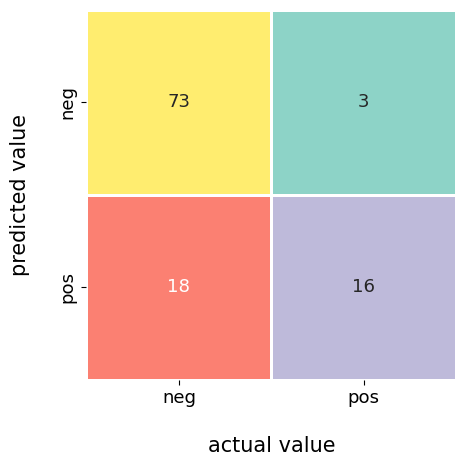

In [50]:
## show confusion matrix for random forest
show_confusion_matrix(y_test, y_pred_forest)

In [51]:
def plot_static_roc_curve(fpr, tpr):
    plt.figure(figsize=[5,5])
    plt.fill_between(fpr, tpr, alpha=.5, color='darkorange')
    # Add dashed line with a slope of 1
    plt.plot(fpr, tpr, color='darkorange', lw=2)
    plt.plot([0,1], [0,1], linestyle=(0, (5, 5)), linewidth=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve");
    
def plot_static_pr_curve(recall, precision):
    plt.figure(figsize=[5,5])
    plt.fill_between(recall, precision, alpha=.5, color='darkorange')
    plt.plot(recall, precision, color='darkorange', lw=2)
    # Add dashed line with a slope of 1
    plt.plot([1,0], [0,1], linestyle=(0, (5, 5)), linewidth=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-recall curve");

In [52]:
roc_auc_score(y_test, y_proba_forest)

0.8695820433436533

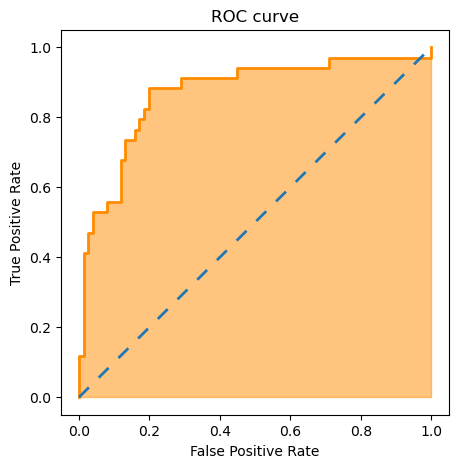

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_forest)
plot_static_roc_curve(fpr,tpr)

In [54]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_forest)
auc(recall, precision)

0.7765196946136101

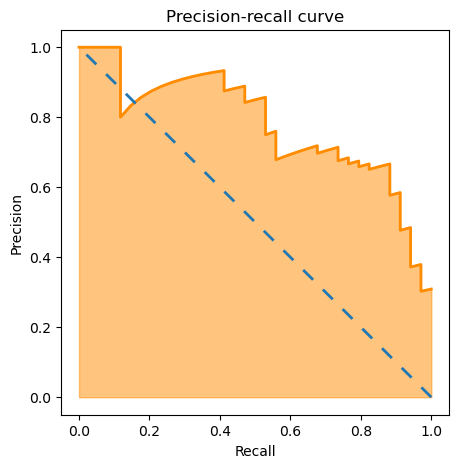

In [55]:
plot_static_pr_curve(recall,precision)

## Hyperparameter tuning

Cross-validation is key to choosing the best possible hyperparameters. This involves splitting the training set into $k$ number of subsets where one subset is used as a validation set and the remaining $k-1$ are used for training. This is then completed over all possible sets of $k$ and the average of the metrics is used to assess the model with the given hyperparameters.

To further this idea, we can use cross-validation in concert with a *grid search* which runs a model with variable hyperparameters that are defined by lists of values. This will "check" the metrics for each of this runs and average them. The optimal combination of hyperparameters will be outputted as the best model.

In [56]:
# Number of trees to be used
rfc_n_estimators = [int(x) for x in np.linspace(100, 500, 5)]
# Maximum length in tree
rfc_max_depth = [int(x) for x in np.linspace(2, 10, 5)]

rfc_grid = {'n_estimators': rfc_n_estimators,
            'max_depth': rfc_max_depth}

# Create the model to be tuned
rfc_base = RandomForestClassifier(random_state=42)

# Create the random search Random Forest
rfc_random = RandomizedSearchCV(estimator = rfc_base, param_distributions = rfc_grid, 
                                n_iter = 200, cv = 4, scoring='f1',
                                random_state = 42, n_jobs = -1)

# Fit the random search model
rfc_random.fit(X_train, y_train)

/Users/z/anaconda3/envs/bmi503/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 25 is smaller than n_iter=200. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='f1')

In [57]:
# Get the optimal parameters
rfc_random.best_params_

{'n_estimators': 300, 'max_depth': 6}

In [58]:
y_pred_best = rfc_random.predict(X_test)
accuracy_score(y_test, y_pred_best)

0.8090909090909091

In [59]:
f1_score(y_test, y_pred_best)

0.6181818181818182

## Feature ranking
In addition to evaluating the random forest classifier, it is sometimes helpful to see how important each of the features were in arriving at final predictions. If we notice that a feature is of little importance, we can eliminate it from our training dataset in order to gain efficiency.

When building a random forest classifier, scikit-learn returns a variable named `feature_importances_`.

In [60]:
## find important features
rfc.feature_importances_

array([0.09379058, 0.17080008, 0.12559761, 0.12461405, 0.2617506 ,
       0.05722339, 0.11600194, 0.05022176])

The raw output is a little difficult to interpret. So, we will put the output in a Pandas Series.

In [61]:
feature_imp = \
    pds.Series(rfc.feature_importances_, index=feature_cols).sort_values(ascending=False)
feature_imp

Glucose                     0.261751
Insulin                     0.170800
BMI                         0.125598
Age                         0.124614
DiabetesPedigreeFunction    0.116002
Pregnancies                 0.093791
BloodPressure               0.057223
SkinThickness               0.050222
dtype: float64

We can also visualize the feature importances using a seaborn barplot.

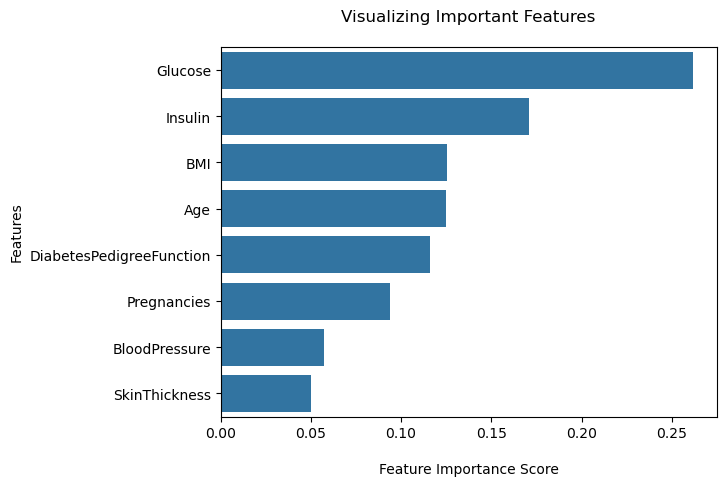

In [62]:
## visualize important features
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('\nFeature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features\n")

plt.show()

## XGBoost

How does this differ from Random Forest? Random Forest uses bagging in order to train a final model. XGBoost works by a method called **boosting**, which is an iterative, sequential method that adds a new decision tree to the overall model at each step to minimize error from the previous trees. Each new tree is a *weak learner* that when all combined creates a strong learner that will accurately predict the outcome.

<img width="500px" src="img/xgboost_boosting.png" />

A problem with XGBoost is that it is highly sensitive to it's hyperparameters. If too many trees are added, it can be overfit. Moreover, the `learning rate` is crucial because the model will perform better if trained slowly, but the likelihood of many trees being created increases with a decreaed learning rate. FInding the right balance for the model is key to the robustness and generalizability of the model.


In [63]:
import xgboost as xgb

In [64]:
## build and fit XGBoost classifier
xgc = xgb.XGBClassifier(objective='reg:logistic',n_estimators=100, \
                        alpha=0.01, max_depth=4, learning_rate=0.1, \
                        colsample_bytree=0.3, use_label_encoder=False)
xgc.fit(X_train, y_train)

y_pred_boost = xgc.predict(X_test)

/Users/z/anaconda3/envs/bmi503/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/z/anaconda3/envs/bmi503/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/z/anaconda3/envs/bmi503/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/z/anaconda3/envs/bmi503/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/z/anaconda3/envs/bmi5

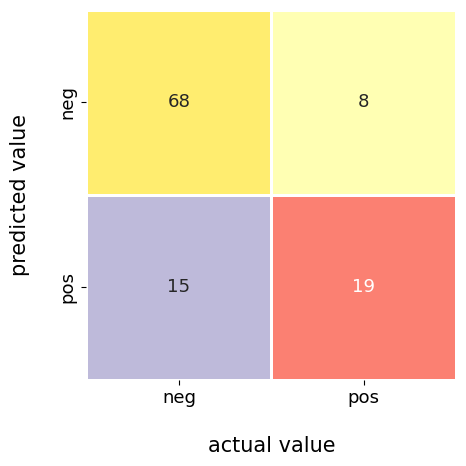

In [65]:
show_confusion_matrix(y_test, y_pred_boost)

In [66]:
accuracy_score(y_test, y_pred_boost)

0.7909090909090909

In [67]:
recall_score(y_test, y_pred_boost)

0.5588235294117647

In [68]:
precision_score(y_test, y_pred_boost)

0.7037037037037037

In [69]:
f1_score(y_test, y_pred_boost)

0.6229508196721312

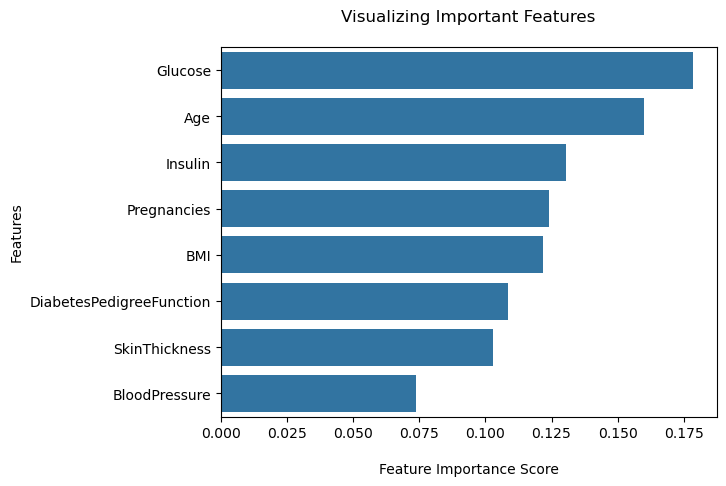

In [70]:
feature_imp = \
    pds.Series(xgc.feature_importances_, index=feature_cols).sort_values(ascending=False)

## visualize important features
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('\nFeature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features\n")

plt.show()

## Wrapping up
In this module, we have covered a numbered of important concepts related to decision tree and random forest classifiers, such as:
* Inspecting the data using correlation matrices and histograms
* Building training and test datasets
* Defining decision tree and random forest classifiers using scikit-learn and predicting target classes
* Evaluating classifiers using a confusion matrix and calculating the accuracy, precision, recall, and F1 scores.
* Inspecting the importance of features in our classifier

## Discussion topics
 
* Interpretability of different models
* Handling high dimensionality of biomedical data
* Models that account for longitudinal data for patient populations
* Missingness in datasets -- imputation and omission
* Generalizability of models for biomedical applications



## References and additional reading

In this module, we covered the basics of implementing and evaluating a logistic regression classifier in scikit learns and a neural network using keras. 

* Burkov A. The Hundred-Page Machine Learning Book by Andriy Burkov. Expert Systems. 2019;5(2):132-50.
* Pedregosa F, Varoquaux G, Gramfort A, Michel V, Thirion B, Grisel O, Blondel M, Prettenhofer P, Weiss R, Dubourg V, Vanderplas J. Scikit-learn: Machine learning in Python. the Journal of machine Learning research. 2011 Nov 1;12:2825-30.
* Chollet F. Keras documentation. keras.io. 2015;33.
* Goodfellow I, Bengio Y, Courville A. Deep learning.
* Bishop C. Pattern Recognition and Machine Learning.
* Friedman JH, Tibshirani R, Hastie T. The Elements of Statistical Learning.
* https://www.codecademy.com/learn/machine-learning
* https://www.w3schools.com/python/python_ml_getting_started.asp